# Friendship paradox

<div style="display: flex; align-items: center;">
    <a target="_blank" href="https://colab.research.google.com/github/yy/netsci-course/blob/master/docs/m02-friendship_paradox/lab02.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" style="vertical-align: -8px; margin-right: 10px;" />
        Open this notebook in Google Colab
    </a>
</div>


<div style="display: flex; align-items: center;">
    <a href="https://raw.githubusercontent.com/yy/netsci-course/master/docs/m02-friendship_paradox/lab02.ipynb" download>
        <img src="http://yyahn.com/netsci-course/images/download_icon.png" style="vertical-align: -8px; margin-right: 10px;" />
        Download this notebook (File -> Save As)
    </a>
</div>

## Let's think about how we store network data

By now you should have a working Juptyer Lab/Notebook and be using Python 3, either through Google Colaboratory or your local Python environment. If not, go back to the previous assignment to make sure that you have a working environment!

When working with network data with code, it's important to think about the data structure—how to represent the data in our computer. To do so, a useful exercise is to think about _what we will need to do with the data_. For instance, obviously, once we have our network data loaded, we should be able to answer questions like "how many nodes are there?" and "how many edges are there?". We would also want to be able to ask "who are the neighbors of node 1?" and "what is the degree of node 1?".

### Node and edge lists or sets

The most immediate (but not a good) way to store network data is to use a list or a set. For instance, we can store the nodes and edges in a list:

In [1]:
node_list = [1, 2, 3, 4, 5, 6]
edge_list = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5), (4, 6)]

Or we can use sets.

In [2]:
node_set = set(node_list)
edge_set = set(edge_list)

We can easily check whether a node/edge is in the network or not. However, it is quite cumbersome to do other operations like finding all neighbors of a node or finding the degree of a node.

In [3]:
def neighbors_from_list_or_set(nodes, edges):
    neighbors = {node: set() for node in nodes}
    for edge in edges:
        neighbors[edge[0]].add(edge[1])
        neighbors[edge[1]].add(edge[0])
    return neighbors

The code is not so bad, but still we have to traverse all edges to figure out the neighbors of a single node. This is horribly inefficient, especially when we have a large network. 

### Adjacency matrix

Another way to store network data is to use an adjacency matrix. An adjacency matrix is a matrix where each row and column represents a node, and the value of the matrix at row $i$ and column $j$ is 1 if there is an edge from node $i$ to node $j$, and 0 otherwise. (we can also store the continuous edge weight instead of 1 or 0.)

$$ A_{ij} = \begin{cases} 1 & \text{if there is an edge from node $i$ to node $j$} \\ 0 & \text{otherwise} \end{cases} $$

For instance, we can use `numpy` to create a small adjacency matrix. 

In [4]:
import numpy as np

adj_matrix = np.array([[0, 1, 1],
                       [1, 0, 1],
                       [1, 1, 0]])

print(adj_matrix)


[[0 1 1]
 [1 0 1]
 [1 1 0]]


What could be the problem with this approach? 

One problem is that the adjacency matrix is not very space efficient. If we have $n$ nodes, we need to store $n^2$ values (a lot of them will be zero). I must say that there are some clever ways to store the adjacency matrix more efficiently (e.g., using sparse matrix) and it may well be the best way to store and compute network data for some cases. However, in general, it is not the easiest or most efficient way to store network data. 

Another operation that is not so easy to do with adjacency matrix is to find the neighbors of a node or compute the degree of a node because we need to traverse all columns or rows of the matrix. Can you write a function that calculates the degree of a node using the adjacency matrix?

**Q: Write a function that calculates the degree of a node using the adjacency matrix.**

In [5]:
def calculate_degree(adj_matrix, node):
    # YOUR SOLUTION HERE

### Adjacency list or set

A pretty good solution is to use an adjacency list or set. The idea is to associate each node with a list or set of nodes that are connected to it. In Python, we can use a dictionary to store (node, neighbrs) as (key, value) pair. For instance,

In [6]:
node2neighbors = {1: {2, 3}, 2: {1, 3, 4}, 3: {1, 2, 4}, 4: {2, 3, 5, 6}, 5: {4}, 6: {4}}

Now the operations that we discussed above can be done quite easily and efficiently. Can you fill in the code below? 

**Q: fill in the blanks below to perform basic network operations using adjacency set data structure.**

In [7]:
def degree(node, node2neighbors):
    # degree (number of neighbors) of a node in a network
    # YOUR SOLUTION HERE

def node_set(node2neighbors):
    # return the set of all nodes in the network
    # YOUR SOLUTION HERE

def is_connected(node2neighbors, i, j):
    # return True if i and j are connected, False otherwise
    # YOUR SOLUTION HERE

## Friendship paradox with `networkx`

`networkx` is one of the most famous Python libraries for network analysis. It provides all the basic functions for network analysis. It's written in Python and thus slower than some other libraries, but it's nice to use, inspect, and learn. 

Let's see how we can use `networkx` to create a network and perform basic network operations by thinking about the friendship paradox. We are going to work through some problems and examples in this notebook. The goal is empirically testing the friendship paradox with multiple types of networks. 

A few tasks will be left to you to complete and submit in your own notebook. Before we dive into creating our own paradox we will go over some basic commands used in the `networkx` library. 

First of all, you can ensure that all results are exactly reproducible by fixing the seed for the random number generator. This is a common technique for checking your computation that involves non-deterministic methods. 

In [8]:
# Please use this random seed for submission.
import random
random.seed(42)     
   
import numpy as np  # noqa: E402
np.random.seed(42)

## Step 1: Using networkx

We are going to start by importing the networkx module:

In [9]:
import networkx as nx

`import xxxxx as xx` is a common way to use widely-used Python libraries. By importing this way, we can use any of the library's classes and functions by prepending the name of the class or function with: 

```
nx.
```

Networkx has extensive documention with many examples. Whenever unsure about the module, go to [the official documentation page](https://networkx.org/documentation/stable/index.html#) and search for the keywords that you are unsure about. In particular, [the official tutorial](https://networkx.org/documentation/stable/tutorial.html) is the best place to learn about the basic usage of `networkx` library. 

Let's start by making a simple undirected graph by hand:

In [10]:
# Creates an instance of a networkx graph.
my_first_graph = nx.Graph() 

# Lets add some nodes to the graph
my_first_graph.add_node(1)
my_first_graph.add_node(2)
my_first_graph.add_node(3)

# Now lets add some connections
my_first_graph.add_edge(1, 2)
my_first_graph.add_edge(3, 2)

We now have our first graph, which contains 3 nodes and 2 edges. We can look at it too by using `draw()` function. By the way, depending on the environment, you may have to import `matplotlib` first (see the `networkx` tutorial). 

`Networkx` is underpowered for network visualization and it is rarely used for any serious network visualization. However, it has basic visualization capacity that is perfectly adequate for examining small networks. 

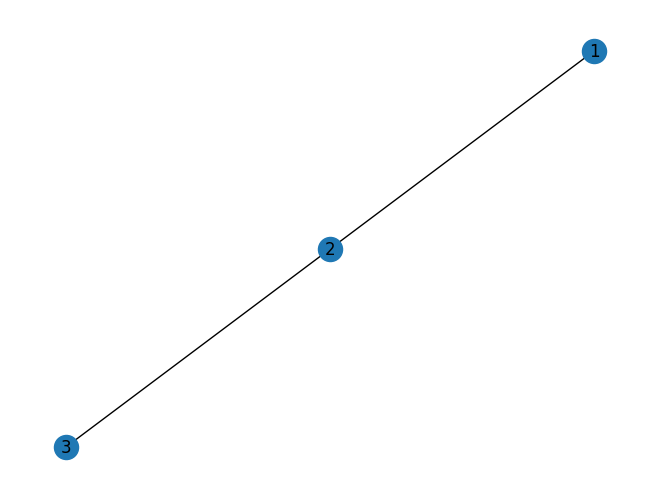

In [11]:
nx.draw(my_first_graph, with_labels=True)

`add_node()` and `add_edge()` are **methods** of the class ```Graph```. Methods are member functions of classes in python and can be called from an object by using the ```.``` notation followed by the method name. We can find out some basic information about this graph using networkx functions and some default python functions:

In [12]:
# len() is a python function that can be applied to any object to obtain their length. 
# networkx defines the number of nodes as the "length" of a graph object. 
len(my_first_graph) 

3

We can also look at the neighbors of a node. 

In [13]:
my_first_graph[2]

AtlasView({1: {}, 3: {}})

In [14]:
my_first_graph.neighbors(2)

Ok. These are not exactly a list, set, or dictionary that you might have expected. `Networkx` uses "views" to let users to examine _read-only_ set- or dictionary-like data structures. For instance, the [`AtlasView`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.classes.coreviews.AtlasView.html) is a "view" of a _dictionary of dictionaries_. Each node may have some attributes (e.g., labels, size, etc.) and they hold these attributes as a dictionary. Therefore, a set of neighbors of a node is a dictionary, where the keys are the neighbor nodes and the values are the attribute dictionary of each node. 

Similarly, calling the `neighbors()` method returns a 'key iterator' of the same dictionary. An iterator yields each successive item. Read about iterators and generators if you are not familiar with them. 

In both cases, you can convert them into a list like the following, 

In [15]:
print(list(my_first_graph[2]))
print(list(my_first_graph.neighbors(2)))

[1, 3]
[1, 3]


Or iterate over the neighbors. 

In [16]:
for node in my_first_graph[2]:
    print(node)

print([node for node in my_first_graph.neighbors(2)])

1
3
[1, 3]


To examine the friendship paradox, we need to also be able to calculate the degree. Once we have the set/list of neighbors, of course we can simply count them. But `networkx` also provides a `degree()` method as well. 

In [17]:
print("Node 2's degree: ", my_first_graph.degree(2))

Node 2's degree:  2


Make sure to review the documentation on both of these functions ([degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html) and [neighbors](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html)) so you are aware what additional arguments you can give. For instance, degree can take a sequence of nodes as an argument and return a sequence of corresponding degrees.

We can also combine python control statements with `networkx` functions:

In [18]:
# Lets get all the neighbors for each node in the graph
for node in my_first_graph.nodes():
    print("Node", node, "'s neighbors:", set(my_first_graph.neighbors(node)))

Node 1 's neighbors: {2}
Node 2 's neighbors: {1, 3}
Node 3 's neighbors: {2}


This `for` loop iterates over the list returned by the networkx graph method `nodes()`. This graph method returns a list of each node in the network. Similarly, we can loop over edges using `edges()`.

In [19]:
# Quick example of iterating over edges
for edge in my_first_graph.edges():
    print(edge)

(1, 2)
(2, 3)


### Step 2: Extreme examples

Now let's apply some of these tools to the friendship paradox. We will start by using `networkx`'s graph generators to construct a graph for us, then we will calculate the average degree of the network. Once that is done we will calculate the average degree of the neighbors of a few random nodes in the network and compare those values with the degree of the nodes themselves.

The one extreme example is the _star network_ where the friendship paradox is extremely strong. Except the node at the center (the star), all other nodes have only one neighbor who are connected to everyone. 



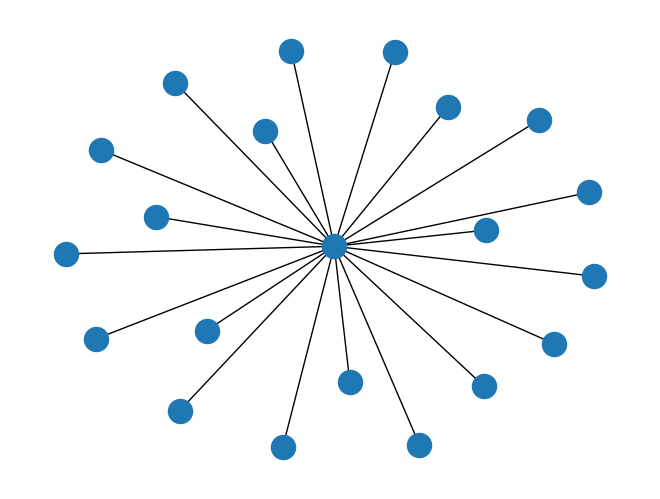

In [20]:
star_graph = nx.star_graph(n=20)
nx.draw(star_graph)

In [21]:
# Lets calculate the average degree of the graph
degree_sum = 0.0
for node in star_graph.nodes():
    # YOUR SOLUTION HERE
avg_degree = degree_sum / len(star_graph)
print("Average degree", avg_degree)

Average degree 1.9047619047619047


In [22]:
# Now lets do it in one line using numpy and list comprehension

# Calculate the average degree of the nodes in the graph
avg_degree = np.mean([star_graph.degree(node) for node in star_graph.nodes()])
print("Average degree:",avg_degree)

Average degree: 1.9047619047619047


To calculate the mean, we used [numpy's mean function](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html), which can come in handy for quickly calculating the mean of a list or sequence along an axis. So I passed the list comprehension directly to ```np.mean``` and it returned the mean of that list. 

Note: Numpy uses its own data types for carrying out calculations, so if you print a numpy float it will display differently than if you printed a python float, which is why we get the intentional truncation of the value when displayed.

For basic graph information, networkx used to have an info() function. However, it has been removed in current versions. [info removed](https://networkx.org/documentation/stable/release/api_0.99.html#info)

Good news! You can easily get the same functionality of the old info() function by defining your own.

In [23]:
def info(graph):
    graph_info = "Name:\t\t\t" + graph.name
    graph_info += "\nType:\t\t\t" + str(type(graph))
    graph_info += "\nNumber of nodes:\t" + str(graph.number_of_nodes())
    graph_info += "\nNumber of edges:\t" + str(graph.number_of_edges())
    
    return graph_info
    
star_graph.name = "Star Graph"
print(info(star_graph))

Name:			Star Graph
Type:			<class 'networkx.classes.graph.Graph'>
Number of nodes:	21
Number of edges:	20


### Q: Average degree of neighbors

Now that you have seen some examples of networkx and numpy, we want you to complete the star graph example by writing a function below that calculates the average degree of a node's neighbors. Test this function to make sure that there is only one node with average neighbor degree of 1 and everyone else has 20. 

This involves find all of a node's neighbors and then taking the average of their degrees. The input arguments into the function should be a node and a networkx graph. The function should return a single value: the average neighbor degree for the given node. You should [learn about how to define and use Python functions](https://www.google.com/search?q=python+function&oq=python+func&aqs=chrome.0.0j69i57j0l4.2723j1j7&sourceid=chrome&ie=UTF-8) if you're not familiar with them yet. Use the space provided below:

In [24]:
def avg_neighbor_degree(G, node):
    # return the average degree of the neighbors of node
    # `G` is a networkx grape and `node` is a node in `G`
    # 1. get the neighbors of node
    # 2. get the degrees of each neighbor
    # 3. calculate and return the average degree of the neighbors

    # YOUR SOLUTION HERE

# Test your function here by going through each node in the graph and printing the average neighbor degree
# YOUR SOLUTION HERE


The average degree of 0's neighbors: 1.0
The average degree of 1's neighbors: 20.0
The average degree of 2's neighbors: 20.0
The average degree of 3's neighbors: 20.0
The average degree of 4's neighbors: 20.0
The average degree of 5's neighbors: 20.0
The average degree of 6's neighbors: 20.0
The average degree of 7's neighbors: 20.0
The average degree of 8's neighbors: 20.0
The average degree of 9's neighbors: 20.0
The average degree of 10's neighbors: 20.0
The average degree of 11's neighbors: 20.0
The average degree of 12's neighbors: 20.0
The average degree of 13's neighbors: 20.0
The average degree of 14's neighbors: 20.0
The average degree of 15's neighbors: 20.0
The average degree of 16's neighbors: 20.0
The average degree of 17's neighbors: 20.0
The average degree of 18's neighbors: 20.0
The average degree of 19's neighbors: 20.0
The average degree of 20's neighbors: 20.0


### Q: Testing the friendship paradox

We would like to check whether the friendship paradox holds for a network. The friendship paradox can be described in many different ways. Here, let's try two ways. First, determine what fraction of nodes in the graph have a larger average neighbor degree than their own. The larger the fraction, the stronger the effect of the friendship paradox. Second, we can calculate the "average neighbor degree" for each node and see if its average is larger than the average of the network. 

For each node we need to find its degree, then average neighbor degree (calculated with the previous function you made). If the average is greater, then it holds for that node. To get the fraction, we can count up all the nodes it holds for and divide by the total number of nodes. Write a function below that will do this for a graph:

In [25]:
# calculate the fraction of nodes in the network whose degree is smaller than the average degree of their neighbors.
 
# YOUR SOLUTION HERE

Fraction of nodes with degree smaller than average degree of their neighbors: 0.95


In [26]:
# Calculate the average degree and the average _neighbor_ degree. 

# YOUR SOLUTION HERE

Average degree: 1.90
Average neighbor degree: 19.10
The difference: 17.19


Even though the star graph is a fairly trivial example it does display the friendship paradox. It is an extreme case where the average degree of the network is wildly different from the average degree of your neighbors. For all but one node (the center node 0) you have fewer friends than your friends.

You can use the star graph to check if you functions work, since we know it holds in that case.

### Q: The other extreme?

Can you come up with the other extreme? Find a network where there is no friendship paradox whatsoever. In other words, for every node, their degree is the same as the any of its neighbor's degree. Can you do the same thing above to test whether this is really the case?

In [27]:
# create a network without friendship paradox

# YOUR SOLUTION HERE

Name:			A mystery graph
Type:			<class 'networkx.classes.graph.Graph'>
Number of nodes:	100
Number of edges:	250

Fraction of nodes with degree smaller than average degree of their neighbors: 0.00

Average degree: 5.00
Average neighbor degree: 5.00
The difference: 0.00


## Step 3: Other types of networks 

Now let's apply your function to two other types of graphs: a scale-free graph and a random graph. Random graphs are generated from randomly connecting nodes together, with each node having the same probability of being connected to any other node. They don't have much structure to them. Below is a visualization of a random graph:

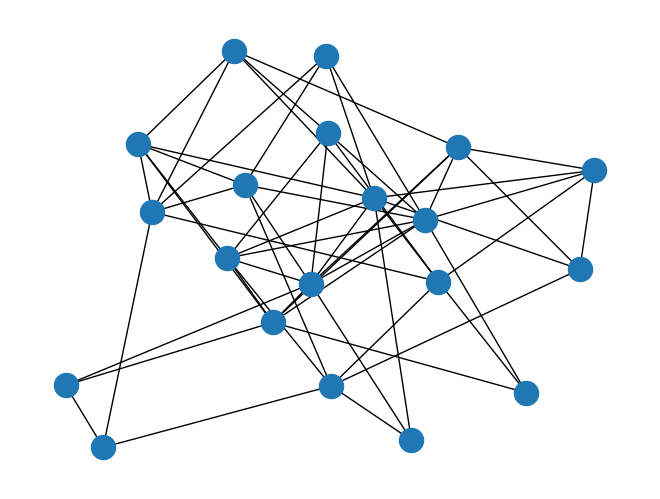

In [28]:
# Draw a random graph with 20 nodes and a connection
# probability of 0.3
rnd_graph = nx.erdos_renyi_graph(n=20, p=0.3)
nx.draw(rnd_graph)

Alternatively, scale-free networks are growing networks where nodes are preferentially attached to nodes with higher degree. This results in structures called 'hubs' which are nodes that have very high degree. Below is a visualization of one such network:

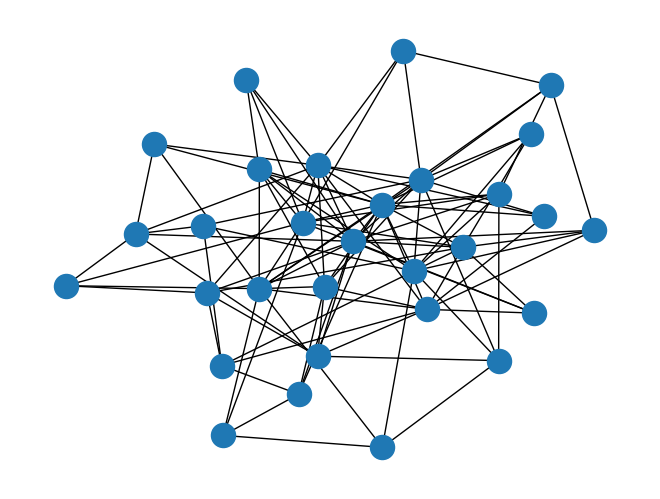

In [29]:
# Draw a scale-free graph with 20 nodes
sf_graph = nx.barabasi_albert_graph(n=30, m=4)
nx.draw(sf_graph)

Unlike in the random graph where nodes tend to have comparable degrees that are situated pretty close to the average, the scale-free network has many low degree nodes and a few very high degree nodes which we can see in the figure above. Many networks tend to have this hub-like structure although they may not follow the exact degree distribution. We will be testing out the friendship paradox on both types of networks.

You can use networkx's generator functions for making the [scale-free graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html) and the [random graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html). 

### Q: Scale-free network
For the scale-free network, use the parameters ```n=200``` and ```m=3```. You should answer the following questions:


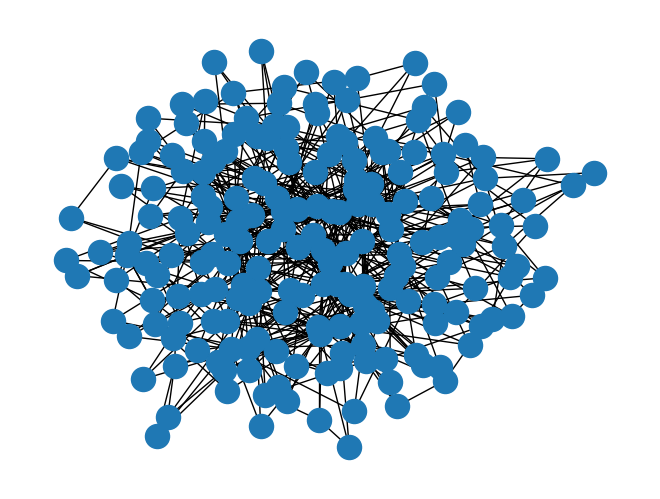

In [30]:
# create a scale-free network with 200 nodes and m=3. 

# YOUR SOLUTION HERE


#### 1. What is the average degree of the graph?

In [31]:
# calculate the average degree of the network

# YOUR SOLUTION HERE

Average degree: 5.91


#### 2. What fraction of nodes in the graph have a larger average neighbor degree than their degree?

In [32]:
# calculate the fraction of nodes in the network whose degree is smaller than the average degree of their neighbors.

# YOUR SOLUTION HERE

Fraction of nodes with degree smaller than average degree of their neighbors: 0.88


#### Compare average degree of the network and the average 'neighbor' degree of the network. 

In [33]:
friendship_paradox_ver2(sf_graph)

Average degree: 5.91
Average neighbor degree: 11.05
The difference: 5.14


#### 3. Did the friendship paradox occur in the scale-free graph? If so, why did it? If not, why not? (provide your response in the markdown cell below)

# YOUR SOLUTION HERE

### Q: Random graph

For the erdos-renyi graph use the parameters ```n=200``` and ```p=0.2```.


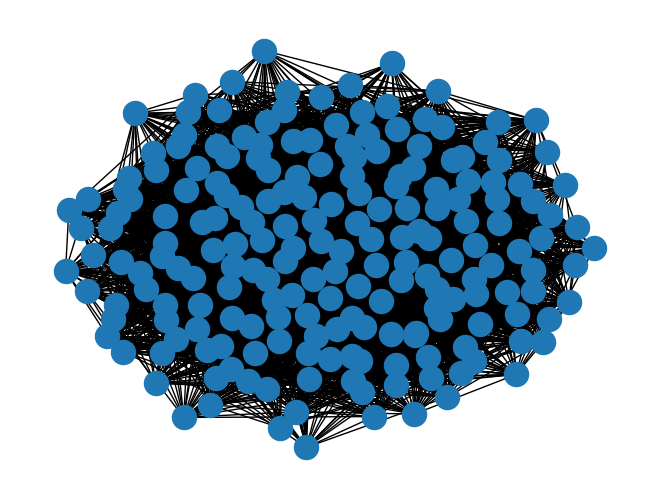

In [34]:
# ER random graph with parameters ```n=200``` and ```p=0.2```

# YOUR SOLUTION HERE



#### 1. What is the average degree of the graph?

In [35]:
# YOUR SOLUTION HERE

Average degree: 40.67


#### 2. What fraction of nodes in the graph have a larger average neighbor degree than their degree?

In [36]:
# YOUR SOLUTION HERE

Fraction of nodes with degree smaller than average degree of their neighbors: 0.57


How about the difference between average degree and average neighbor degree?

In [37]:
friendship_paradox_ver2(er_graph)

Average degree: 40.67
Average neighbor degree: 41.52
The difference: 0.85


#### 3. It seems like we still see a small difference. Why? The ER graph is a random graph, so why is there still a difference? (provide your response in the markdown cell below)

# YOUR SOLUTION HERE

**Rename your notebook as 'friendship_lastname_firstname'. Export it as an HTML file as well. Upload both to Canvas.**

# Optional exercise

Above, we compared the node's degree with the _average degree of its neighbors_. But we can also ask: what's the probability that a _random neighbor of a randomly chosen node_ has a larger degree than the randomly chosen node? Can you test this? 

In [38]:
# Above, we compared the node's degree with the _average degree of its neighbors_. But we can also ask: what's the probability that a _random neighbor of a randomly chosen node_ has a larger degree than the randomly chosen node? Can you test this? 
import random 

def random_neighbor_has_larger_degree(G):
    # return the probability that a random neighbor of a random node has a larger degree than the random node
    # 1. randomly choose a node
    # 2. randomly choose a neighbor of the node
    # 3. compare the degrees of the node and its neighbor
    # 4. repeat steps 1-3 many times and calculate the fraction of times the neighbor has a larger degree than the node
    # YOUR SOLUTION HERE


print("In SF network: ", random_neighbor_has_larger_degree(sf_graph))
print("In ER network: ", random_neighbor_has_larger_degree(er_graph))



In SF network:  0.694
In ER network:  0.513


Also, we have only examined model networks. How about real networks? There are several repositories of real-world networks. For instance,

- https://icon.colorado.edu
- https://networks.skewed.de 

It may be fun to test how many networks you can find that have the friendship paradox!